
https://data.mesaaz.gov/Financial-Services/Debt-Service/p2t3-kgkn/about_data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("/content/Debt_Service_20241130.csv")

In [10]:
df

,Issue Group,Issue ID,Issue,CUSIP,Maturity Date,Dated Date,Fund,Fund Description,Tax Status,Coupon Rate,Interest,Principal,Sum,Pay Date
0,CFD-CADE,606,CAD1 2019 Bonds,12738CAF4,07/01/2029,07/10/2019,1491-CAD1,Cadence - SAD 1,Exempt from Tax,3.25,5395,0,5395,01/01/2025
1,CFD-CADE,606,CAD1 2019 Bonds,12738CAG2,07/01/2033,07/10/2019,1491-CAD1,Cadence - SAD 1,Exempt from Tax,3.75,5850,0,5850,01/01/2025
2,CFD-CADE,606,CAD1 2019 Bonds,12738CAH0,07/01/2043,07/10/2019,1491-CAD1,Cadence - SAD 1,Exempt from Tax,4.50,23850,0,23850,01/01/2025
3,CFD-CADE,607,CAD2 2019 Bonds,12738CAK3,07/01/2029,07/10/2019,1491-CAD2,Cadence - SAD 2,NaN,3.25,715,0,715,01/01/2025
4,CFD-CADE,607,CAD2 2019 Bonds,12738CAL1,07/01/2043,07/10/2019,1491-CAD2,Cadence - SAD 2,NaN,4.50,2700,0,2700,01/01/2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23127,Utility Obligations,641,2023 Util Oblig,5905452R9,07/01/2048,12/07/2023,3215-WW,Utility Systems Obligations Remption - Waste W...,Exempt from Tax,5.00,97574,0,97574,01/01/2048
23128,Utility Obligations,641,2023 Util Oblig,5905452R9,07/01/2048,12/07/2023,3215-ELC,Utility Systems Obligations Redemption - ELC,Exempt from Tax,5.00,5245,209792,215037,07/01/2048
23129,Utility Obligations,641,2023 Util Oblig,5905452R9,07/01/2048,12/07/2023,3215-GAS,Utility Systems Obligations Redemption - GAS,Exempt from Tax,5.00,55757,2230272,2286029,07/01/2048
23130,Utility Obligations,641,2023 Util Oblig,5905452R9,07/01/2048,12/07/2023,3215-WTR,Utility Systems Obligations Redemption - Water,Exempt from Tax,5.00,193424,7736960,7930384,07/01/2048


In [24]:
df["Dated Date"] = pd.to_datetime(df["Dated Date"], format="%m/%d/%Y")
df["Pay Date"] = pd.to_datetime(df["Pay Date"], format="%m/%d/%Y")
df["Maturity Date"] = pd.to_datetime(df["Maturity Date"], format="%m/%d/%Y")

In [69]:
# Calculate the loan balance and interest over time
df['Interest'] = df['Coupon Rate'] * df['Principal']
df['Principal Paid'] = df['Principal'] - df['Interest']

# Create a range of dates for plotting the data
date_range = pd.date_range(start=df['Pay Date'].min(), end=df['Maturity Date'].max(), freq='D')

# Calculate the cumulative principal and interest over time
principal_due = []
interest_due = []
total_debt = []


for date in date_range:
    # Sum up principal and interest for each date
    total_principal = np.sum(df[df['Pay Date'] <= date]['Principal'])
    total_interest = np.sum(df[df['Pay Date'] <= date]['Interest'])
    principal_due.append(total_principal)
    interest_due.append(total_interest)
    total_debt.append(total_principal+total_interest)

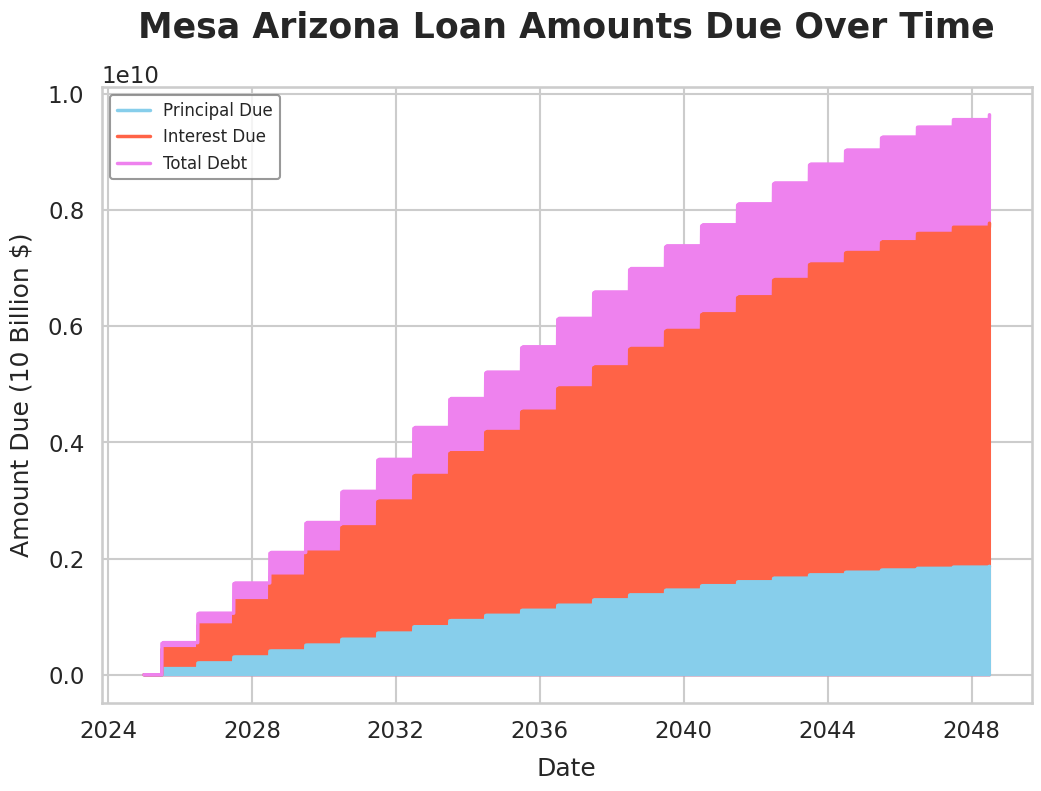

In [87]:
sns.set_style("whitegrid")
sns.set_palette("muted")
sns.set_context("talk")

plt.figure(figsize=(12, 8))

sns.lineplot(x=date_range, y=principal_due, label="Principal Due", color="skyblue", linewidth=2.5)
sns.lineplot(x=date_range, y=interest_due, label="Interest Due", color="tomato", linewidth=2.5)
sns.lineplot(x=date_range, y=total_debt, label="Total Debt", color="violet", linewidth=2.5)

plt.fill_between(date_range, total_debt, color="violet", alpha=1)
plt.fill_between(date_range, interest_due, color="tomato", alpha=1)
plt.fill_between(date_range, principal_due, color="skyblue", alpha=1)

plt.xlabel('Date', labelpad=10)
plt.ylabel('Amount Due (10 Billion $)', labelpad=10)
plt.title('Mesa Arizona Loan Amounts Due Over Time', fontsize=25, fontweight='bold', pad=20)

plt.legend(loc="upper left", fontsize=12, frameon=True, edgecolor="gray")
plt.show()

In [67]:
principal_due[-1]

1867057499

In [68]:
interest_due[-1]

7773063049.236